In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', None)
from IPython.display import display

In [3]:
df = pd.read_csv('output/data/forum_summaries.csv')
display(df.head(5))

,forum_id,forum_timestamp,total_posts,user_id,total_posts_per_user
0,17924097,2005-10-06 10:53:36,129,37a4045ac8054fb73af2b0ea73d21b3f,97
1,17924097,2005-10-06 10:53:36,129,9ddaf41c17205ed390f7d2333f30f1ee,1
2,17924097,2005-10-06 10:53:36,129,2d6c4be6b6a408a6a9e596d7aa6a70bd,1
3,17924097,2005-10-06 10:53:36,129,7dd579a0889ecbc7b5881c2d4f452ee9,1
4,17924097,2005-10-06 10:53:36,129,d62bffffd3f252f2d70ec015b4fd1c4f,4


In [4]:
df.columns

Index(['forum_id', 'forum_timestamp', 'total_posts', 'user_id',
       'total_posts_per_user'],
      dtype='object')

In [5]:
df.shape

(2365, 5)

In [6]:
df.dtypes

forum_id                 int64
forum_timestamp         object
total_posts              int64
user_id                 object
total_posts_per_user     int64
dtype: object

In [7]:
df.index

RangeIndex(start=0, stop=2365, step=1)

In [8]:
df.columns

Index(['forum_id', 'forum_timestamp', 'total_posts', 'user_id',
       'total_posts_per_user'],
      dtype='object')

In [9]:
df.head(5)

,forum_id,forum_timestamp,total_posts,user_id,total_posts_per_user
0,17924097,2005-10-06 10:53:36,129,37a4045ac8054fb73af2b0ea73d21b3f,97
1,17924097,2005-10-06 10:53:36,129,9ddaf41c17205ed390f7d2333f30f1ee,1
2,17924097,2005-10-06 10:53:36,129,2d6c4be6b6a408a6a9e596d7aa6a70bd,1
3,17924097,2005-10-06 10:53:36,129,7dd579a0889ecbc7b5881c2d4f452ee9,1
4,17924097,2005-10-06 10:53:36,129,d62bffffd3f252f2d70ec015b4fd1c4f,4


In [10]:
df.tail(5)

,forum_id,forum_timestamp,total_posts,user_id,total_posts_per_user
2360,1075314698,2009-12-16 01:38:32,58,948f2f02520580412c1da9633268cf05,8
2361,1075314698,2009-12-16 01:38:32,58,c5571ba90d3ea1a363b75bc6a23b1ae9,1
2362,1075314698,2009-12-16 01:38:32,58,71dea4de1bbd28d0bef53dc071fd2d82,36
2363,1075314698,2009-12-16 01:38:32,58,3bf36edf7d7cfea59234f180bdcfc7e8,4
2364,1075314698,2009-12-16 01:38:32,58,dc5eba5f649771481f14f3510640e4eb,8


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 5 columns):
forum_id                2365 non-null int64
forum_timestamp         2365 non-null object
total_posts             2365 non-null int64
user_id                 2365 non-null object
total_posts_per_user    2365 non-null int64
dtypes: int64(3), object(2)
memory usage: 92.5+ KB


In [12]:
len(df.forum_id.unique())

123

In [13]:
len(df.user_id.unique())

1490

In [14]:
for col in df.columns: 
    print(col) 

forum_id
forum_timestamp
total_posts
user_id
total_posts_per_user


In [15]:
user_most_Posts = df.sort_values(by=['total_posts_per_user'], ascending=False)
user_most_Posts.head(10)

,forum_id,forum_timestamp,total_posts,user_id,total_posts_per_user
1648,757792776,2008-11-07 17:24:54,672,9c952df16fd587e0495e47381951c9f3,256
1650,757792776,2008-11-07 17:24:54,672,be09632c95ce2d71bb61b8556a07dd2b,206
76,118816770,2006-04-19 20:38:13,347,53aa49403eaa7830ab10234d95089dfb,159
1016,569606150,2008-03-26 16:13:40,552,6e67ee9ef210d83cf763cf26a1ab4200,159
1702,839221261,2009-02-24 12:18:16,506,05e4bc5f942e84490425df4e3227c571,156
580,447053831,2007-10-06 01:16:16,1085,98a1158681336a8cd09b5e880a5a2d5e,137
379,436011008,2007-09-19 11:29:20,697,efcf6c5c6aa66402f6e5e50b6f3484cd,128
351,434896898,2007-09-18 14:37:43,506,7b17707aa7c7d4726b90c8725c99c75d,116
157,320634883,2007-03-19 13:41:35,756,7b17707aa7c7d4726b90c8725c99c75d,111
0,17924097,2005-10-06 10:53:36,129,37a4045ac8054fb73af2b0ea73d21b3f,97


In [16]:
forum_most_Posts = df[['forum_id','total_posts']]
forum_most_Posts = forum_most_Posts.drop_duplicates(subset='forum_id', keep='first') 
forum_most_Posts = forum_most_Posts.sort_values(by=['total_posts'], ascending=False)
forum_most_Posts.head(10)

,forum_id,total_posts
566,447053831,1085
2038,1012498434,938
88,220528647,884
154,320634883,756
376,436011008,697
1323,712572931,696
1647,757792776,672
1016,569606150,552
1702,839221261,506
348,434896898,506


In [17]:
df_text = pd.read_csv('output/data/forum_texts.csv')
display(df_text.head(5))

,forum_id,message_id,parent_id,user_id,text
0,17924097,23789569,NaN,37a4045ac8054fb73af2b0ea73d21b3f,1) Liberalisierung des Außenhandels: (1-11) W...
1,17924097,23789570,23789569.0,37a4045ac8054fb73af2b0ea73d21b3f,1) Liberalisierung des Außenhandels: (1-11) W...
2,17924097,30408705,NaN,37a4045ac8054fb73af2b0ea73d21b3f,"Hallo Herr Schumann, ich habe eine Frage zur ..."
3,17924097,30408706,30408705.0,37a4045ac8054fb73af2b0ea73d21b3f,Dadurch das die Transformationskurve linear u...
4,17924097,30408707,NaN,37a4045ac8054fb73af2b0ea73d21b3f,"Hallo, mir ist bei den Nachteilen von Exporte..."


In [18]:
df_text.columns

Index(['forum_id', 'message_id', 'parent_id', 'user_id', 'text'], dtype='object')

In [19]:
len(df_text.forum_id.unique()) # no. of forums

123

In [20]:
len(df_text.user_id.unique()) # no. of users

1490

In [21]:
# method to check if message without parent equal to the no. of forum
df1 = df_text[['forum_id','message_id','parent_id']]
df1.shape

(16614, 3)

In [22]:
df_links = pd.read_csv('output/data/forum_links.csv')
display(df_links.head(5))

,forum_id,message_id,user_id,link
0,17924097,23789570,37a4045ac8054fb73af2b0ea73d21b3f,http://de.wikipedia.org/wiki/RGW
1,17924097,295010307,d62bffffd3f252f2d70ec015b4fd1c4f,http://www.schinkelplatz.de/forumbilder/forums...
2,53379073,58818562,8b10dad500f04f65cee9cb145196765d,http://www.cmsmatrix.org/
3,53379073,85000194,2c2be155a1c073ca2981acfca3001f35,http://139.18.2.163/joomla
4,53379073,85000194,2c2be155a1c073ca2981acfca3001f35,http://139.18.2.163/joomla/administrator


In [23]:
def nans(df): return df[df.isnull().any(axis=1)]

df_tmp = df1.dropna()

df_parent_nan = df1[df1['parent_id'].isnull()]
#df_parent_nan.shape
len(df_parent_nan.message_id.unique()) # no. of message without parents

3081

In [24]:
len(df_parent_nan.forum_id.unique())

123

In [25]:
df_parent_nan.groupby(['forum_id']).size() # no. of messages of each forum group

forum_id
17924097       59
53379073       42
79233025        6
80510977       12
80510978        7
80510982       15
98729985       15
115277825      23
118816770     108
182222850      11
220528647      70
224460821       6
248610817       6
249069570      20
317849608      15
320634883      86
326828035       3
330399751      19
330399756       8
330498051       4
343605249       7
351338498       6
351338504       8
351338505       9
351338506       6
357433345       8
362283013      61
401276934       8
424443905      34
434896898      59
436011008     177
436011010      17
436011011      18
436011012      41
436011013      44
436240384       2
447053831     154
447709189       6
449282054      13
451870723       4
452657154       3
452657164      11
452657166       6
452657186      25
454983686      10
457474058      18
460128261      13
464846855      15
465436676       7
465436677      12
465436682      14
465436685      12
482705411      48
489488387      11
498892801      14
5

In [26]:
df_users = pd.read_csv('output/data/forum_users.csv')
display(df_users.head(5))

,user_id,question_start_time,question_end_time,role
0,37a4045ac8054fb73af2b0ea73d21b3f,2005-09-16 09:34:22,2012-05-29 14:52:37,student
1,9ddaf41c17205ed390f7d2333f30f1ee,unknown,unknown,unknown
2,2d6c4be6b6a408a6a9e596d7aa6a70bd,unknown,unknown,unknown
3,7dd579a0889ecbc7b5881c2d4f452ee9,unknown,unknown,unknown
4,d62bffffd3f252f2d70ec015b4fd1c4f,unknown,unknown,unknown


In [27]:
df_emoj = pd.read_csv('output/data/forum_emojis.csv')
display(df_emoj.head(5))

,forum_id,message_id,user_id,angel,blushing,confused,cool,devil,grin,kiss,ohoh,sad,smile,tongue,ugly,wink
0,17924097,72515591,37a4045ac8054fb73af2b0ea73d21b3f,0,0,0,0,0,0,0,0,0,1,0,0,0
1,17924097,76611592,37a4045ac8054fb73af2b0ea73d21b3f,0,0,0,0,0,0,0,0,0,1,0,0,0
2,17924097,77299714,37a4045ac8054fb73af2b0ea73d21b3f,0,0,0,0,0,0,0,0,0,1,0,0,0
3,17924097,295010306,d62bffffd3f252f2d70ec015b4fd1c4f,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17924097,295436316,d62bffffd3f252f2d70ec015b4fd1c4f,0,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
display(df_text.head(5))
df_text.dtypes

,forum_id,message_id,parent_id,user_id,text
0,17924097,23789569,NaN,37a4045ac8054fb73af2b0ea73d21b3f,1) Liberalisierung des Außenhandels: (1-11) W...
1,17924097,23789570,23789569.0,37a4045ac8054fb73af2b0ea73d21b3f,1) Liberalisierung des Außenhandels: (1-11) W...
2,17924097,30408705,NaN,37a4045ac8054fb73af2b0ea73d21b3f,"Hallo Herr Schumann, ich habe eine Frage zur ..."
3,17924097,30408706,30408705.0,37a4045ac8054fb73af2b0ea73d21b3f,Dadurch das die Transformationskurve linear u...
4,17924097,30408707,NaN,37a4045ac8054fb73af2b0ea73d21b3f,"Hallo, mir ist bei den Nachteilen von Exporte..."


forum_id        int64
message_id      int64
parent_id     float64
user_id        object
text           object
dtype: object

In [36]:
# method of posts graph
import csv
import codecs

G = nx.DiGraph()

#extract and add edge if message_id has a parent_is nodes in graph
ifile  = open("output/data/forum_texts.csv","rb")
f1 = csv.reader(codecs.iterdecode(ifile, 'utf-8'))
i = 1
for row in f1:
    if i < 300 and i > 1:
        G.add_edge(row[2],row[1])
    i +=1

In [37]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 299
Number of edges: 298
Average in degree:   0.9967
Average out degree:   0.9967


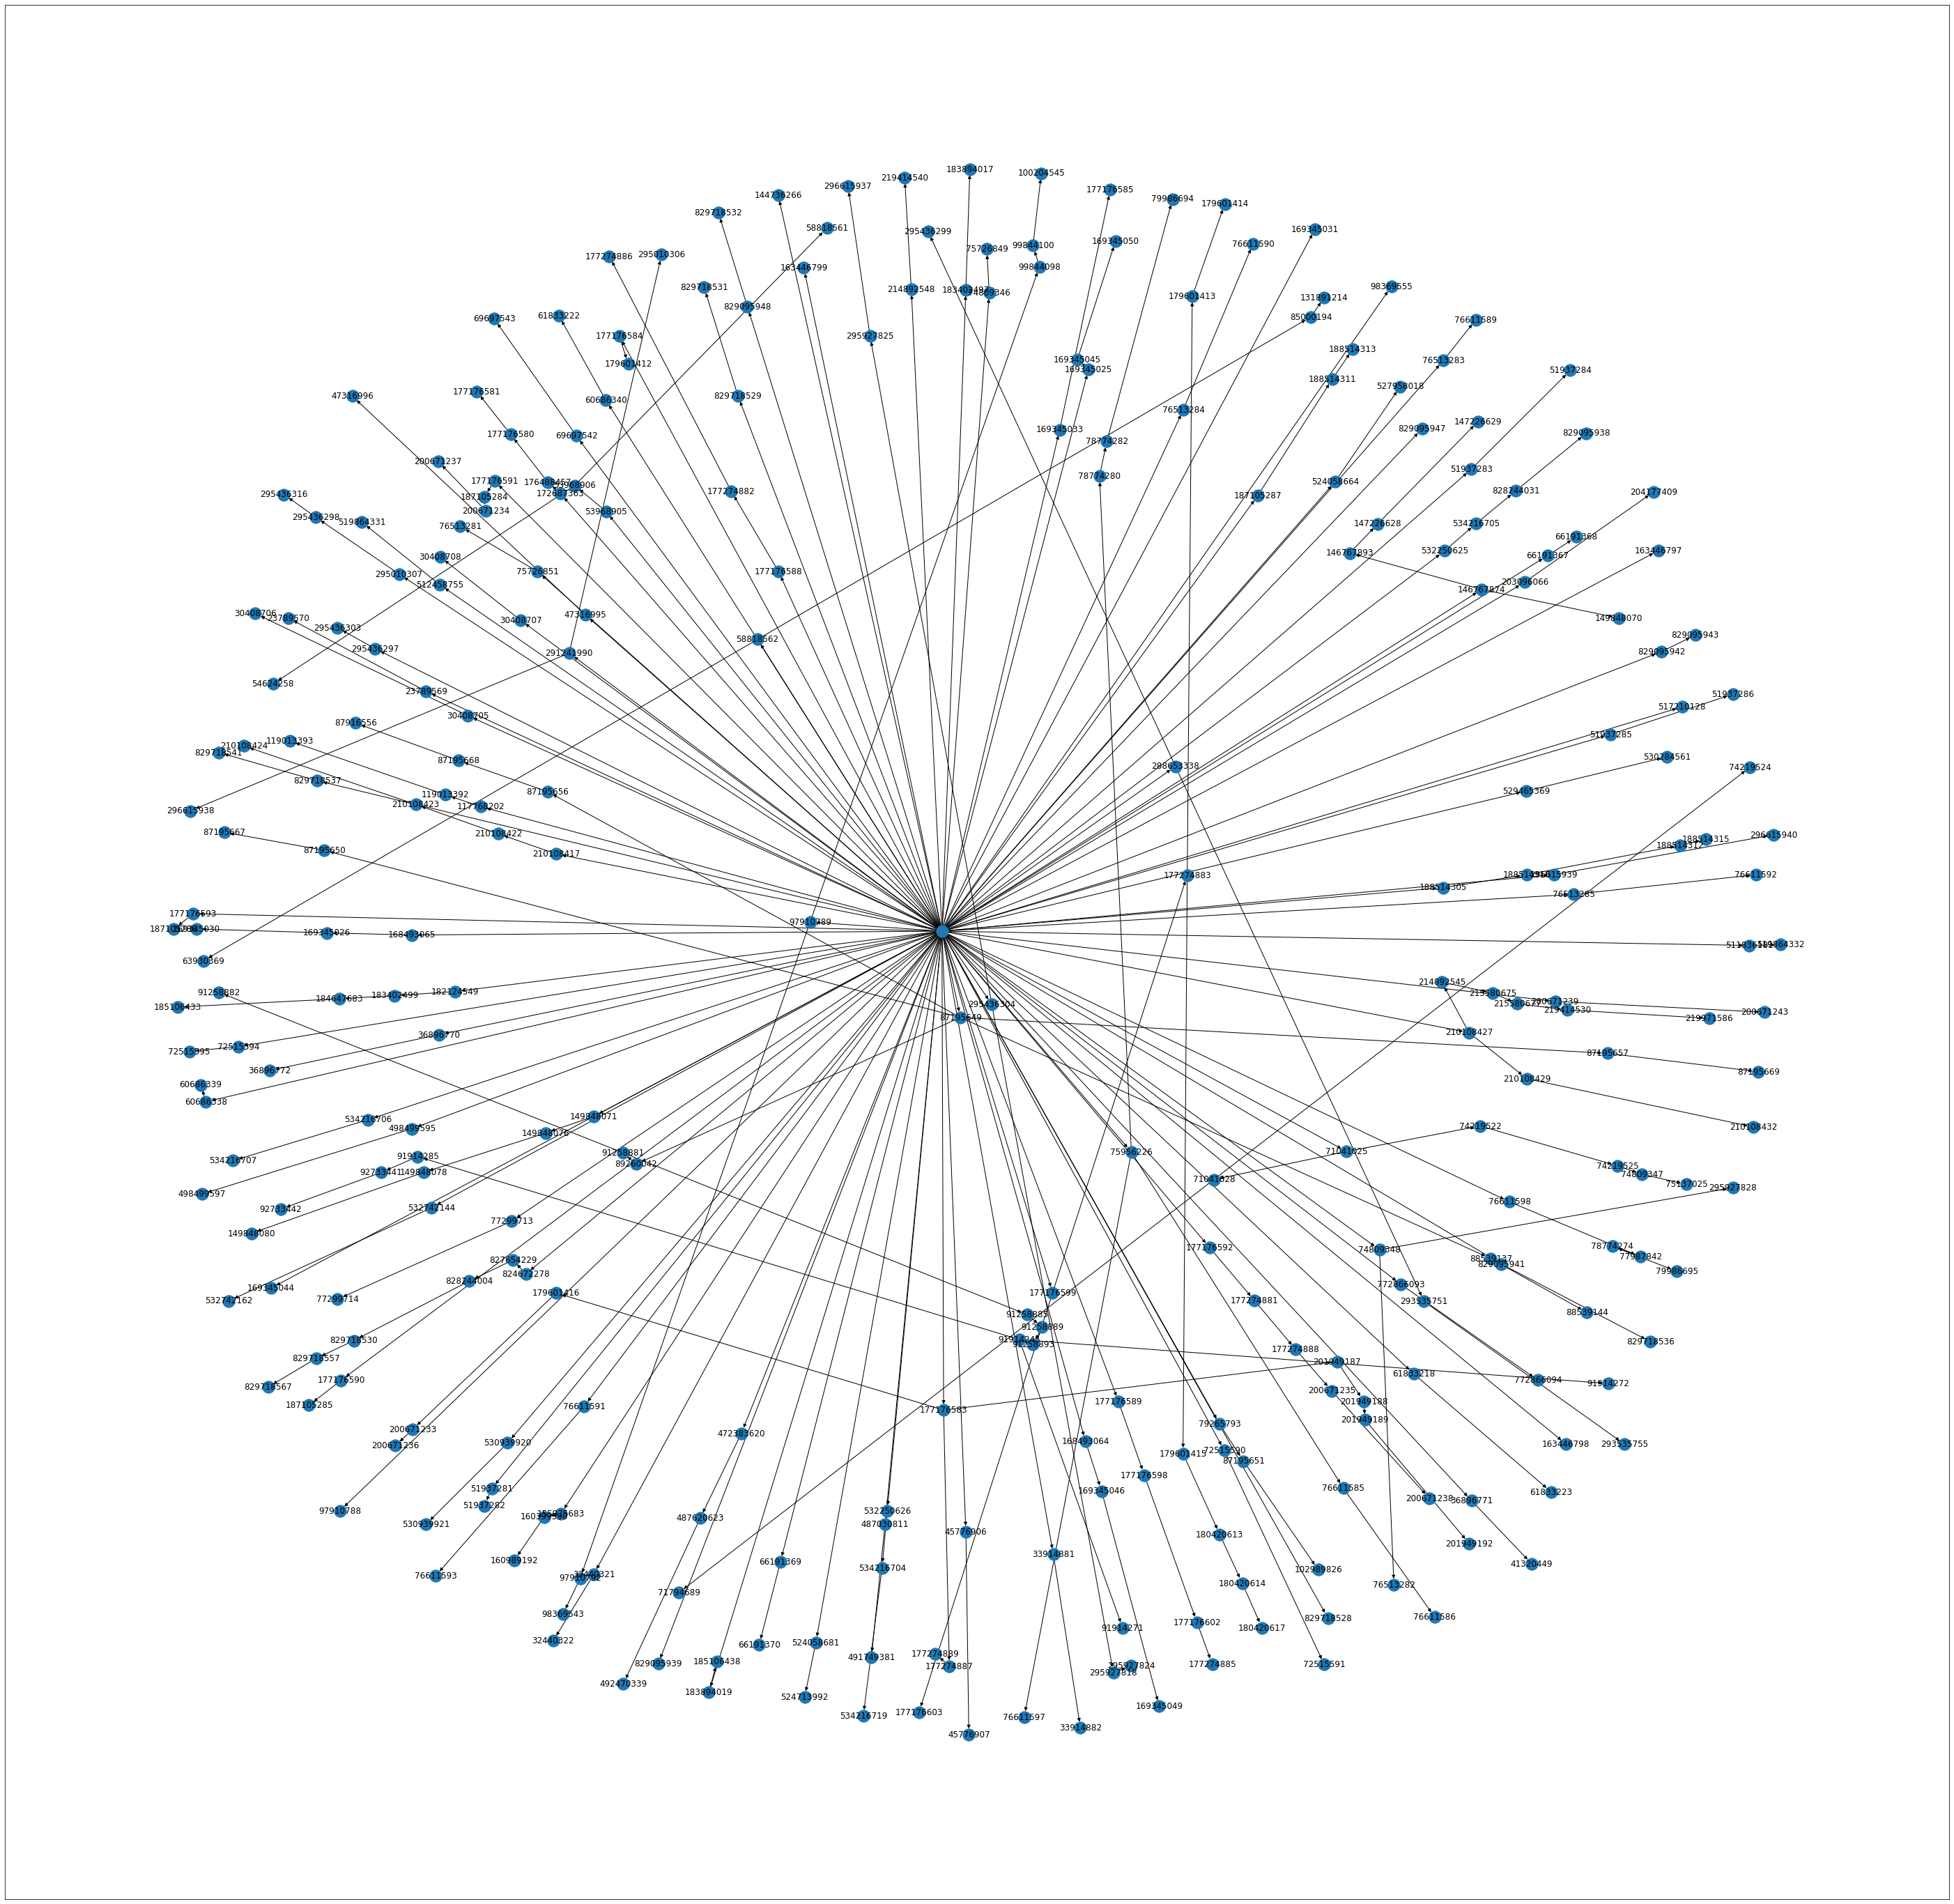

In [38]:
plt.figure(figsize=(50,50))
nx.draw_networkx(G);

In [ ]:
# http://pablobarbera.com/big-data-upf/html/02a-networks-intro-visualization.html

In [ ]:
# plotly interactive graph library, https://plot.ly/python/